# day 171,day 176,day 178,day 180

In [ ]:
import torch
from torch import nn # contains all building blocks of neural networks for pytorch,the name itself implies it.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
# check the pytorch version

torch.__version__

'2.0.1+cu118'

In [ ]:
# preparing the data for regression
'''regression-line formula is y = w*x + b '''

# setting the parameters
weight = 0.7
bias = 0.3

# creating the data
X = torch.randint(1,99,(500,1))
y = weight*X + bias

# splitting the data
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)



In [ ]:
len(x_train), len(y_train)

(400, 400)

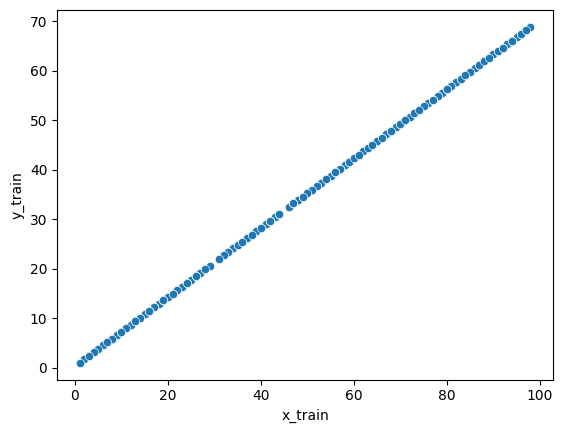

In [ ]:
# visualizing the data

data = pd.DataFrame({'x_train':x_train.flatten(),'y_train':y_train.flatten()})
sns.scatterplot(data=data,x='x_train',y='y_train')

plt.show()

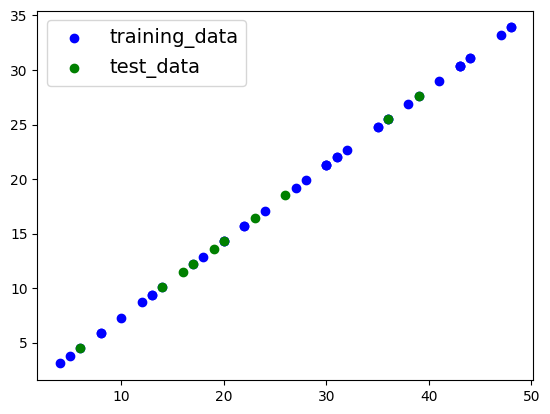

In [44]:
# creating a prediction plot

def prediction_plot(x_train,x_test,y_train,y_test,prediction):

  # plotting the training data
  plt.scatter(x_train.flatten(),y_train.flatten(),color='b',label='training_data')

  # plotting the test data
  plt.scatter(x_test.flatten(),y_test.flatten(),color='g',label='test_data')

  # plotting the predictions
  if prediction is not None:
    plt.scatter(x_test.flatten(),prediction.flatten(),color='r',label='predictions')

  plt.legend(prop={'size':14})
  plt.show()


prediction_plot(x_train,x_test,y_train,y_test,prediction=None)

# our first pytorch model


* some of the essentials for building the network

1. torch.nn
2. torch.nn.Module -> base class
3. torch.nn.Parameter -> for defining the parameters in the model
4. torch.nn.optim -> this is optimizer
5. def forward() -> defines all the forward computation that will happen in the network.
6. torch.utils.data.dataset -> imports some inbuilt datasets as per choice
7. torch.utils.data.dataloader -> it is used to load the data hence the name:dataloader

In [ ]:

class LinearRegressionModel(torch.nn.Module):

  def __init__(self):
    super().__init__()

    # initialize the weights parameter
    self.weight = torch.nn.Parameter(torch.randn(1,
                                           requires_grad=True,
                                           dtype=torch.float32))


    # initialize the bias parameter
    self.bias = torch.nn.Parameter(torch.randn(1,
                                           requires_grad=True,
                                           dtype=torch.float32))

    # forward function to initiate the computations
  def forward(self,x:torch.Tensor):
    return self.weight*x + self.bias




In [ ]:
# setting the random seed to get reproducibility of the same results
torch.random.manual_seed(42)

# create the model
model0 = LinearRegressionModel()

#check the parameters
print('Parameters of the model:')
print(list(model0.parameters()))

print('\n')

# list name parameters
print('List named parameters')
print(model0.state_dict())




Parameters of the model:
[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]


List named parameters
OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])


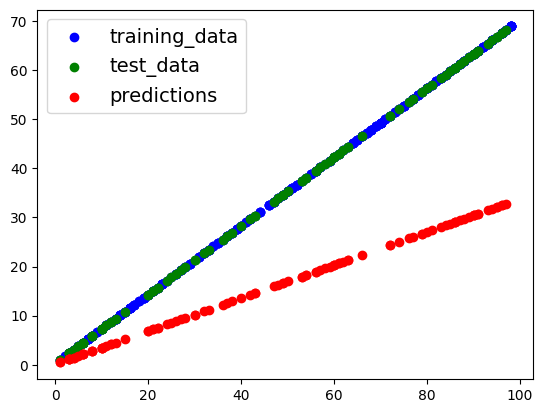

'Terrible right? '

In [ ]:
# making prediction with our model with no optimization done it yet

with torch.inference_mode():
  prediction = model0(x_test)

# lets see how our predictions work
prediction_plot(x_train,x_test,y_train,y_test,prediction=prediction)

# conclusion:
'''Terrible right? '''

In [ ]:
# building the model from scratch:

torch.manual_seed(42)

epoch_count = []
train_loss = []
test_loss = []

class LinearRegressionModel(torch.nn.Module):
  def __init__(self):
    super().__init__()

    # setting the parameters
    self.weight = torch.nn.Parameter(torch.randn(1,
                                              requires_grad=True,
                                              dtype=torch.float32))

    self.bias = torch.nn.Parameter(torch.randn(1,
                                               requires_grad=True,
                                               dtype=torch.float32))

  def forward(self,x:torch.Tensor):
    return self.weight*x + self.bias

model0 = LinearRegressionModel()

# compiling the model
loss = torch.nn.L1Loss()
optimizer = torch.optim.SGD(params=model0.parameters(),
                            lr=0.0001)

# fit the model
epochs = 100

for epoch in range(epochs):

  # training

  # set the training
  model0.train()

  # get training_prediction
  actual_training = y_train
  prediction_training = model0(x_train)

  # get loss
  loss_train = loss(prediction_training,actual_training)

  # set the optimizer to zero_grad
  optimizer.zero_grad()

  # set the loss backpropogate
  loss_train.backward()

  # set the optimizer to step up and adjust as per requirement
  optimizer.step()

  # testing
  model0.eval()

  with torch.inference_mode():

    # find the loss_test
    prediction_test = model0(x_test)
    actual_test = y_test

    loss_test = loss(prediction_test,actual_test)


    # getting the values appended
    epoch_count.append(epoch)
    train_loss.append(loss_train)
    test_loss.append(loss_test)

    # print state_dict on every 10th epoch (we don't want to clutter the screen)

    if epoch%10 == 0:

      print("Epoch: {} | Train_Loss: {} | Test_Loss: {}".format(epoch,loss_train,loss_test))
      print(model0.state_dict())
      print('----------')










Epoch: 0 | Train_Loss: 18.689990997314453 | Test_Loss: 17.075132369995117
OrderedDict([('weight', tensor([0.3418])), ('bias', tensor([0.1289]))])
----------
Epoch: 10 | Train_Loss: 16.09079933166504 | Test_Loss: 14.668745040893555
OrderedDict([('weight', tensor([0.3928])), ('bias', tensor([0.1299]))])
----------
Epoch: 20 | Train_Loss: 13.491608619689941 | Test_Loss: 12.262358665466309
OrderedDict([('weight', tensor([0.4437])), ('bias', tensor([0.1309]))])
----------
Epoch: 30 | Train_Loss: 10.892417907714844 | Test_Loss: 9.85597038269043
OrderedDict([('weight', tensor([0.4947])), ('bias', tensor([0.1319]))])
----------
Epoch: 40 | Train_Loss: 8.29321575164795 | Test_Loss: 7.4495697021484375
OrderedDict([('weight', tensor([0.5457])), ('bias', tensor([0.1329]))])
----------
Epoch: 50 | Train_Loss: 5.694009304046631 | Test_Loss: 5.0431671142578125
OrderedDict([('weight', tensor([0.5967])), ('bias', tensor([0.1339]))])
----------
Epoch: 60 | Train_Loss: 3.094801902770996 | Test_Loss: 2.63

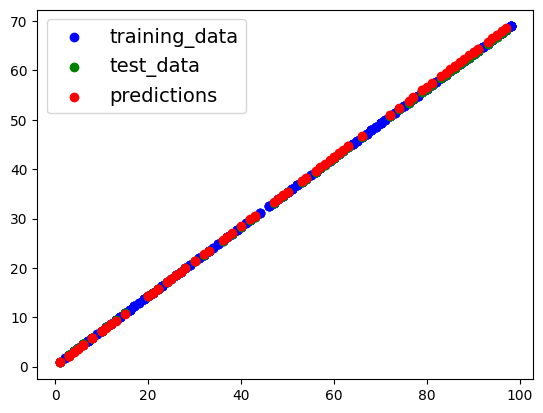

In [ ]:
with torch.inference_mode():
  prediction_test = model0(x_test)

prediction_plot(x_train,x_test,y_train,y_test,prediction_test)

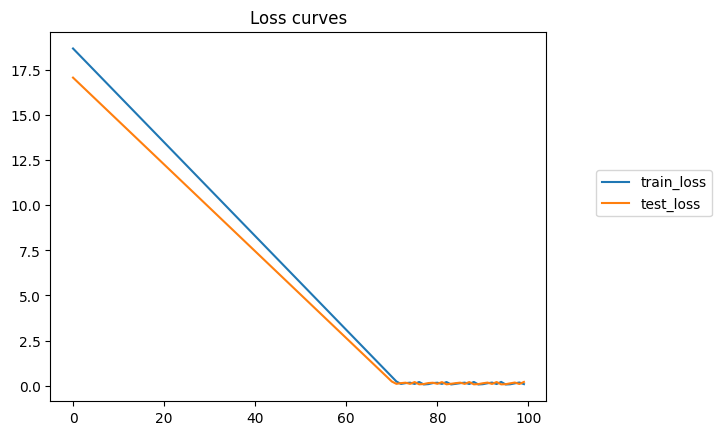

In [ ]:
plt.plot(epoch_count,torch.tensor(train_loss),label='train_loss')
plt.plot(epoch_count,torch.tensor(test_loss),label='test_loss')

plt.title('Loss curves')
plt.legend(loc=(1.1,0.5))
plt.show()

In [ ]:
model0.state_dict()

OrderedDict([('weight', tensor([0.7066])), ('bias', tensor([0.1368]))])

In [ ]:
torch.tensor(train_loss)

tensor([18.6900, 18.4301, 18.1702, 17.9102, 17.6503, 17.3904, 17.1305, 16.8706,
        16.6106, 16.3507, 16.0908, 15.8309, 15.5710, 15.3110, 15.0511, 14.7912,
        14.5313, 14.2714, 14.0114, 13.7515, 13.4916, 13.2317, 12.9718, 12.7119,
        12.4519, 12.1920, 11.9321, 11.6722, 11.4123, 11.1523, 10.8924, 10.6325,
        10.3726, 10.1127,  9.8527,  9.5928,  9.3329,  9.0730,  8.8131,  8.5531,
         8.2932,  8.0333,  7.7734,  7.5135,  7.2535,  6.9936,  6.7337,  6.4738,
         6.2139,  5.9539,  5.6940,  5.4341,  5.1742,  4.9142,  4.6543,  4.3944,
         4.1345,  3.8746,  3.6146,  3.3547,  3.0948,  2.8349,  2.5750,  2.3150,
         2.0551,  1.7952,  1.5353,  1.2754,  1.0154,  0.7555,  0.4956,  0.2357,
         0.0978,  0.1414,  0.1688,  0.0963,  0.2070,  0.0690,  0.0870,  0.1446,
         0.1660,  0.0995,  0.2041,  0.0700,  0.1020,  0.1392,  0.1704,  0.0941,
         0.2087,  0.0684,  0.0846,  0.1347,  0.1741,  0.0926,  0.2100,  0.0680,
         0.0791,  0.1296,  0.1782,  0.08

# explanation:

# why the gradient is set to zero on every itertion/epoch?

**vanishing gradients/exploding gradients**: the gradient descent's step size is determined by its learning rate. A larger learning rate would give a larger move in the valley of data in search of the ideal point, and a smaller learning rate would give a smaller move in the valley of data in search of the ideal point. But the learning rate decreases as gradient accumulates, that's how it is mathematically designed, making it impossible to reach/converge to the ideal point on the valley. Thus the act of setting the gradient to zero. Setting the gradient to Zero prevents it from accumulating and therefore prevent decreasing learning rate(vanishing gradients).conversely, sometimes the learning rate may also explode larger and larger at each iteration with gradient not being set to zero this may well cause the gradient to overshoot the ideal point on the valley.

# saving your model:

In [ ]:
from pathlib import Path

# creating a path
model_path = Path('model0')
model_path.mkdir(parents=True,exist_ok=True)

# model save path`
model_name = 'pytorch_workflow0_first_save.pth'
model_saved_path = model_path / model_name

# saving the model
print('Saving the model to the save path')
torch.save(obj=model0.state_dict(),
           f=model_saved_path)

Saving the model to the save path


# loading our model

In [ ]:
# loading our model

# first intantiate the load_model = model class of the model that it wants to load from storage.
loaded_model0 = LinearRegressionModel()

# second load the model
loaded_model0.load_state_dict(torch.load(f=model_saved_path))

<All keys matched successfully>

# making predictions with our loaded model

In [ ]:
# testing
loaded_model0.eval()

with torch.inference_mode():
  loaded_test_prediction = loaded_model0(x_test)

loaded_test_prediction



tensor([[68.6755],
        [52.4240],
        [29.8134],
        [55.9570],
        [ 7.2027],
        [42.5319],
        [39.7055],
        [43.2385],
        [66.5557],
        [65.8491],
        [63.7294],
        [51.0109],
        [ 7.2027],
        [39.7055],
        [44.6516],
        [38.2924],
        [43.2385],
        [ 0.8434],
        [51.0109],
        [53.8372],
        [55.9570],
        [19.9212],
        [67.2623],
        [40.4121],
        [14.2685],
        [56.6635],
        [30.5199],
        [35.4660],
        [ 4.3763],
        [ 5.7895],
        [28.4002],
        [54.5438],
        [37.5858],
        [ 2.2566],
        [41.8253],
        [26.9870],
        [41.1187],
        [ 0.8434],
        [ 5.7895],
        [63.7294],
        [22.7475],
        [ 3.6697],
        [63.0228],
        [60.9031],
        [26.2804],
        [63.7294],
        [46.7714],
        [64.4360],
        [34.7594],
        [17.0948],
        [33.3463],
        [ 8.6158],
        [ 2.

In [ ]:
# checking whether our model's prediction_test == loaded_test_prediction

prediction_test == loaded_test_prediction

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        

# putting all the things we learned together!(practice! practice! practice!)

# day 180

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from sklearn.model_selection import train_test_split

In [ ]:
# device agnostic code:
device = 'cuda' if torch.cuda.is_available() else 'cpu'


# preparing the data
weight = 0.7
bias = 0.3
x = torch.randn(500,1)
y = weight*x + bias

# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)



# instantiating the model class:
class LinearRegressionModel(torch.nn.Module):
  def __init__(self):
    super().__init__()

    # setting the parameters
    self.weight = torch.nn.Parameter(torch.randn(1,
                                                 requires_grad=True,
                                                 dtype=torch.float32,
                                                 device=device))

    self.bias = torch.nn.Parameter(torch.randn(1,
                                               requires_grad=True,
                                               dtype=torch.float32,
                                               device=device))


  def forward(self,x:torch.Tensor):
    return self.weight*x + self.bias

# creating the model
model1 = LinearRegressionModel()

# setting compilation parameters
loss = torch.nn.L1Loss()
optimizer = torch.optim.SGD(params=model1.parameters(),lr=0.01)

# fitting the model
epochs = 100
epoch_container = []
train_loss_container = []
test_loss_container = []

for epoch in range(epochs):

  # training
  model1.train()

  # getting training loss
  train_prediction = model1(x_train)
  train_actual = y_train
  train_loss = loss(train_prediction,train_actual)

  # setting the gradient to zero for every iteration in the optimizer
  optimizer.zero_grad()

  # coming backward in losses
  train_loss.backward()

  # stepping up a notch in optimizer
  optimizer.step()


  # testing the model
  model1.eval()

  with torch.inference_mode():
    # getting test_loss
    test_prediction = model1(x_test)
    test_actual = y_test
    test_loss = loss(test_prediction,test_actual)

    # filling in the empty containers
    epoch_container.append(epoch)
    train_loss_container.append(train_loss)
    test_loss_container.append(test_loss)


    # giving the output at every 10th epoch
    if epoch%10 == 0:

      print("Epoch: {} | Train Loss: {} | Test Loss: {}".format(epoch,train_loss,test_loss))
      print(model1.state_dict())
      print("-------------------------")









Epoch: 0 | Train Loss: 0.5595923662185669 | Test Loss: 0.529700517654419
OrderedDict([('weight', tensor([0.4778])), ('bias', tensor([0.8511]))])
-------------------------
Epoch: 10 | Train Loss: 0.46252813935279846 | Test Loss: 0.4347304403781891
OrderedDict([('weight', tensor([0.4811])), ('bias', tensor([0.7527]))])
-------------------------
Epoch: 20 | Train Loss: 0.3720134496688843 | Test Loss: 0.34617674350738525
OrderedDict([('weight', tensor([0.4937])), ('bias', tensor([0.6588]))])
-------------------------
Epoch: 30 | Train Loss: 0.2882104516029358 | Test Loss: 0.2656158208847046
OrderedDict([('weight', tensor([0.5157])), ('bias', tensor([0.5703]))])
-------------------------
Epoch: 40 | Train Loss: 0.21088851988315582 | Test Loss: 0.19089117646217346
OrderedDict([('weight', tensor([0.5480])), ('bias', tensor([0.4888]))])
-------------------------
Epoch: 50 | Train Loss: 0.13822892308235168 | Test Loss: 0.12282653152942657
OrderedDict([('weight', tensor([0.5894])), ('bias', tens

In [ ]:
# saving the model
from pathlib import Path
model_path = Path('model1')
model_path.mkdir(parents=True,exist_ok=True)
model_name = "torch_workflow0_2ndmodel.pth"
model_saved_path = model_path / model_name
torch.save(obj=model1.state_dict(),
           f=model_saved_path)

In [ ]:
# load the model

# intantiate it
loaded_model1 = LinearRegressionModel()

# load the state_dict of the model
loaded_model1.load_state_dict(torch.load(f=model_saved_path))


<All keys matched successfully>

In [ ]:
# make prediction from the loaded_model1

with torch.inference_mode():
  loaded_test_prediction = loaded_model1(x_test)

loaded_test_prediction

tensor([[ 1.1984],
        [ 0.7890],
        [ 0.3836],
        [ 1.0732],
        [-0.5777],
        [ 0.7308],
        [ 0.1508],
        [ 0.7862],
        [ 0.8854],
        [ 0.5882],
        [ 1.6265],
        [ 0.6671],
        [ 0.3349],
        [-0.4793],
        [ 0.6515],
        [ 1.6206],
        [ 0.4866],
        [-0.9764],
        [ 1.1437],
        [ 0.0049],
        [-0.0759],
        [-1.2050],
        [ 0.4682],
        [-0.4283],
        [ 0.7370],
        [-0.4364],
        [ 0.2358],
        [ 0.3267],
        [ 0.3743],
        [-0.0153],
        [ 1.1497],
        [ 0.2381],
        [ 0.7841],
        [ 1.5865],
        [ 0.8993],
        [ 0.1863],
        [ 0.7091],
        [ 0.0946],
        [-0.0093],
        [ 1.2622],
        [-0.2610],
        [ 0.3699],
        [-0.8008],
        [-0.1196],
        [ 0.2360],
        [ 0.1302],
        [-0.0802],
        [ 0.2788],
        [ 1.5046],
        [ 0.6490],
        [-0.0548],
        [ 0.6865],
        [ 2.

In [ ]:
# checking whether loaded_test_prediction matched with original prediction of the model

with torch.inference_mode():
  original_test_prediction = model1(x_test)

original_test_prediction == loaded_test_prediction

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        

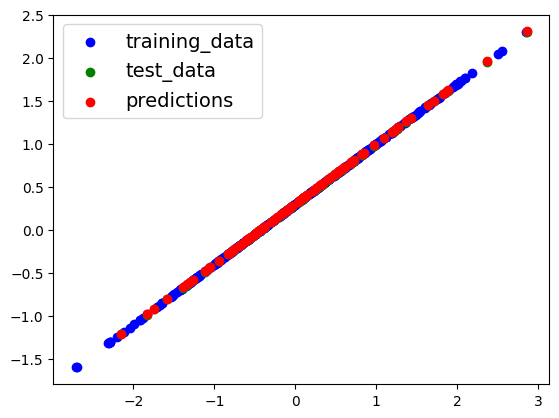

In [ ]:
# plotting

prediction_plot(x_train,x_test,y_train,y_test,loaded_test_prediction)

# practice2 with guidance

# day 180,day 182

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [40]:
# manual_seed
torch.manual_seed(42)

# data
weight = 0.7
bias = 0.3
x = torch.randint(1,50,(50,1),dtype=torch.float32)
y = x*weight + bias

# splitting the data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# setting the data to appropriate devices:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
x_train = x_train.to(device)
x_test = x_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

# instantiating the model with needful parameters.
class LinearRegressionModel(torch.nn.Module):

  def __init__(self):
    super().__init__()

    self.linear_layer = torch.nn.Linear(in_features=1,
                    out_features=1)


  def forward(self,x:torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)


# creating and compiling the model
lrm2 = LinearRegressionModel()

loss = torch.nn.L1Loss()
optimizer = torch.optim.SGD(params=lrm2.parameters(),
                            lr=0.001)


# fitting the model

epochs = 200
epochs_container = []
test_loss_container = []
train_loss_container = []

for epoch in range(epochs):

  # training the model
  lrm2.train()


  # train_loss
  train_prediction = lrm2(x_train)
  train_actual = y_train
  train_loss = loss(train_prediction,train_actual)

  # setting the optimizer to zero grad
  optimizer.zero_grad()

  # backpropogatting the losses
  train_loss.backward()

  # step the optimizer forward
  optimizer.step()


  # testing the model
  lrm2.eval()

  # getting into the inference mode
  with torch.inference_mode():

    # finding the test loss
    test_prediction = lrm2(x_test)
    test_actual = y_test
    test_loss = loss(test_prediction,test_actual)

    # filling the empty containers
    epochs_container.append(epoch)
    train_loss_container.append(train_loss)
    test_loss_container.append(test_loss)

    # displaying the results in every 10th epoch
    if epoch%10 == 0:
      print("Epoch: {} | Train Loss: {} | Test Loss: {}".format(epoch,train_loss,test_loss))
      print(lrm2.state_dict())
      print('----------------------------')






Epoch: 0 | Train Loss: 46.947601318359375 | Test Loss: 36.59608459472656
OrderedDict([('linear_layer.weight', tensor([[-0.9625]])), ('linear_layer.bias', tensor([-0.3854]))])
----------------------------
Epoch: 10 | Train Loss: 39.443702697753906 | Test Loss: 30.6730899810791
OrderedDict([('linear_layer.weight', tensor([[-0.6888]])), ('linear_layer.bias', tensor([-0.3754]))])
----------------------------
Epoch: 20 | Train Loss: 31.93979835510254 | Test Loss: 24.75008773803711
OrderedDict([('linear_layer.weight', tensor([[-0.4150]])), ('linear_layer.bias', tensor([-0.3654]))])
----------------------------
Epoch: 30 | Train Loss: 24.43589210510254 | Test Loss: 18.82708740234375
OrderedDict([('linear_layer.weight', tensor([[-0.1413]])), ('linear_layer.bias', tensor([-0.3554]))])
----------------------------
Epoch: 40 | Train Loss: 16.93198585510254 | Test Loss: 12.904088020324707
OrderedDict([('linear_layer.weight', tensor([[0.1325]])), ('linear_layer.bias', tensor([-0.3454]))])
---------

In [46]:
# save the model
from pathlib import Path

model_path = Path('lrm2')
model_path.mkdir(parents=True,exist_ok=True)

model_name = 'linear_regression_model2_practice.pth'
model_saved_path = model_path/model_name

torch.save(obj=lrm2.state_dict(),
           f=model_saved_path)

In [47]:
# load the model

# instantiating the model
loaded_lrm2 = LinearRegressionModel()

# loading the state_dict of the model
loaded_lrm2.load_state_dict(torch.load(model_saved_path))

<All keys matched successfully>

In [48]:
# verifying the results of the loaded model with that of the original model

with torch.inference_mode():
  loaded_test_prediction = loaded_lrm2(x_test)
  original_test_prediction = lrm2(x_test)


loaded_test_prediction == original_test_prediction

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

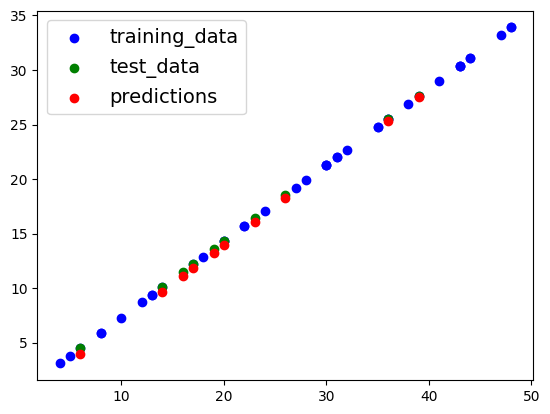

In [45]:
prediction_plot(x_train,x_test,y_train,y_test,loaded_test_prediction)